In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('titanic_train_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df = df[['Survived','Pclass','Sex','Age','Fare']]
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


cleaning dataset

In [48]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [49]:
print('Percentage of missing "Age" records is %.2f%%' %((df['Age'].isnull().sum()/df.shape[0])*100))

Percentage of missing "Age" records is 19.87%


In [50]:
df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))

In [51]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

changing categorical to numerical

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()
# labelencoder - efficient tool for encoding the levels of categorical features into numeric values(alphabetically 0 to n-1)

In [54]:
df['Sex'] = le.fit_transform(df.Sex)


In [55]:
df.to_csv('preprocessed_data.csv')

Node class

In [12]:
#A class representing a node in a decision tree
class Node ():
    #initializing a new instance of the Node class
    def __init__(self, feature = None, threshold=None, left=None, right=None, gain=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value

Decision Tree Class

In [13]:
class DecisionTree():
    def __init__(self, min_samples = 2, max_depth = 2):
        self.min_samples = min_samples
        self.max_depth = max_depth

    #min_samples: Minimum number of samples required to split an internal node.
    #max_depth: Maximum depth of the decision tree  

# splitting the data on given features and threshold anf returns left and right dataset.
    # dataset: Input dataset.
    # feature: Index of the feature to be split on.
    # threshold: Threshold value to split the feature on.
    def split_data(self, dataset, feature, threshold):
        left_dataset = []
        right_dataset = []

        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        #convert both sets into numpy arrays
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

#Compute the Entropy. Parameter(y): input label values.
    def entropy(self, y):
        entropy = 0
        labels = np.unique(y)
        for label in labels:
            label_examples = y[y == label]
            p1 = len(label_examples)/len(y)
            entropy += -p1 * np.log2(p1)
            return entropy

#Compute Information Gain by splitting parent dataset into two datasets
    def information_gain(self, parent , left ,right):
        information_gain = 0
        #compute entropy for parent node
        parent_entropy = self.entropy(parent)
        
        #calculate weight for left and right nodes
        weight_left = len(left)/ len(parent)
        weight_right = len(right)/ len(parent)

        #compute entropy for left/right nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)

        #calculate weighted entropy
        weighted_entropy = weight_left * entropy_left + weight_right* entropy_right

        #calculate information gain
        information_gain = parent_entropy - weighted_entropy
        return information_gain


#finding the best split
    def best_split(self, dataset, num_samples, num_features):
        #dictionary to store best split values
        best_split = {'gain' : 1,'feature' : None, 'threshold' : None}

        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index]
            
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            
           
            for threshold in thresholds:
               
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    
                    # get y values of the parent and left, right nodes
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    
                    # compute information gain based on the y values
                    information_gain = self.information_gain(y, left_y, right_y)
                   
                    # update the best split if conditions are met
                    if information_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = information_gain
        return best_split



Splitting the data

In [14]:
X = df[['Pclass','Sex','Age','Fare']]
y = df[['Survived']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=101)

Training the model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Decision Tree Classifier Hyperparameter tuning(Grid SearchCV)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
clf = DecisionTreeClassifier(random_state=42)
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

cv = GridSearchCV(
    clf, 
    params,  
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

In [21]:
cv.fit(X_train, y_train)
best_params = cv.best_params_
print(f"Best paramters: {best_params})")

clf = DecisionTreeClassifier(**best_params)
clf.fit(X_train, y_train)



Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'})


DecisionTreeClassifier(max_depth=5, min_samples_split=4)

checking the accuracy

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
prediction_test = clf.predict(X_test)
accuracy_score(y_test, prediction_test)

0.7835820895522388

In [24]:
prediction_train = clf.predict(X_train)
accuracy_score(y_train,prediction_train)

0.8459069020866774

In [25]:
#Here we can clearly see that for training dataset our accuracy is very high whereas for test dataset it is very low,
#hence our model is overfitted and to avoid this we will use Pruning method later.

Visualizing our decision tree

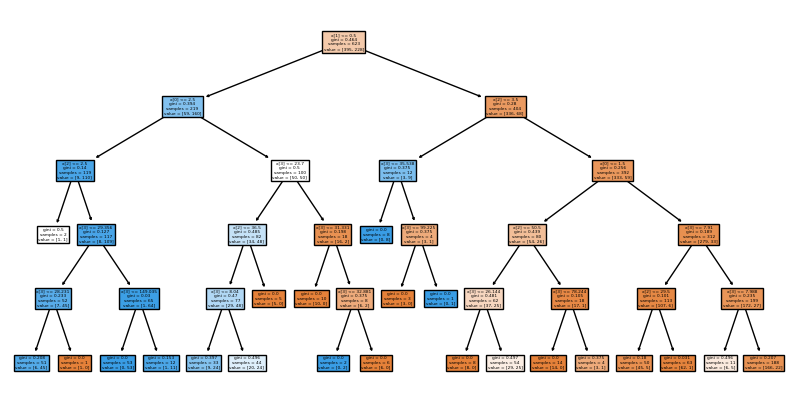

In [26]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(clf,filled=True)
plt.show()

finding false positive rate and true positive rate

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [28]:
dt_probs = clf.predict_proba(X_test)[:,1]


In [29]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

Plotting ROC curve for our decision tree

In [30]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt


0.803030303030303

In [31]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,5))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

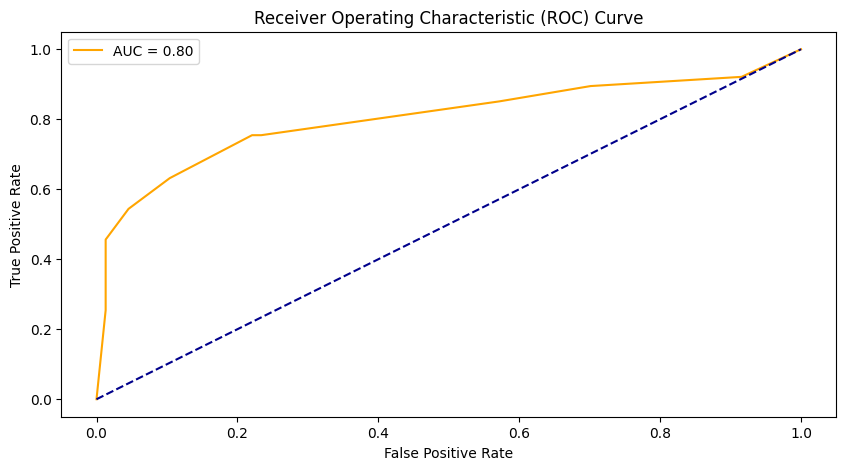

In [32]:
plot_roc_curve(fpr_dt,tpr_dt)

It means there is a 70% chance that the model will be able to distinguish between positive class and negative class.

Purning of decision tree

This pruning technique is parameterized by the cost complexity parameter, ccp_alpha .

In [33]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

cost_complexity_pruning_path-returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process

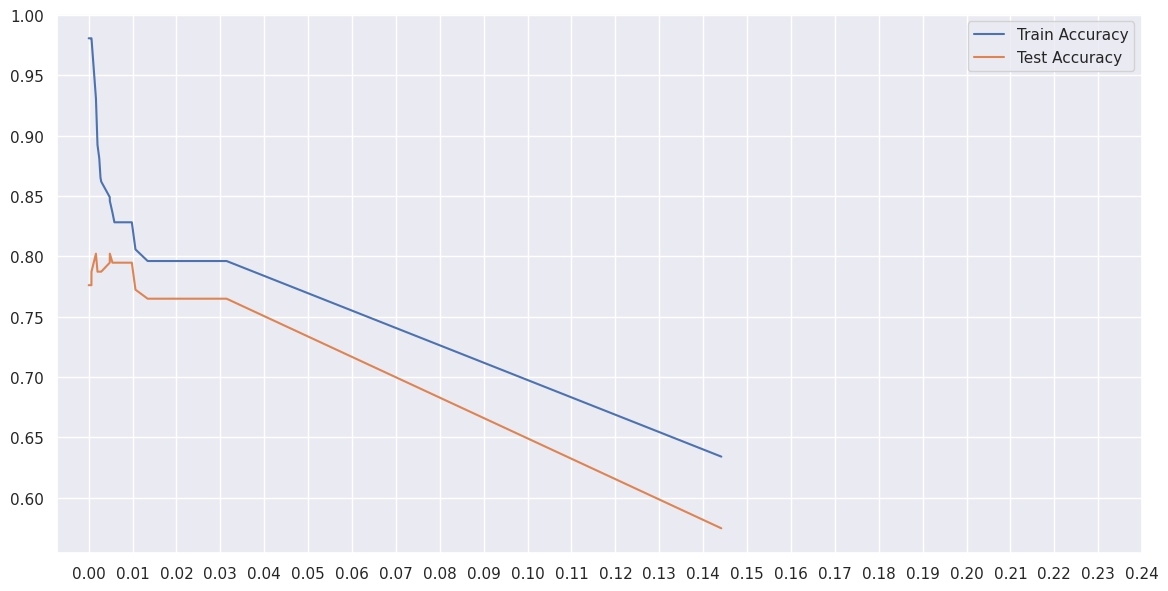

In [34]:
acc_train, acc_test = [], []

for i in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=i)

    clf.fit(X_train,y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    acc_train.append(accuracy_score(y_train,y_train_pred))
    acc_test.append(accuracy_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y = acc_train, x = ccp_alphas,label = 'Train Accuracy')
sns.lineplot(y = acc_test, x = ccp_alphas,label = 'Test Accuracy')
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [35]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
clf.fit(X_train,y_train)
#ccp_alphas- Cost Complexity Purning provides another option to control the size of a tree.
# As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

Acuracy after purning

In [36]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.7947761194029851

In [37]:
pred = clf.predict(X_train)
accuracy_score(y_train,pred)

0.8282504012841091

Visualizing after purning

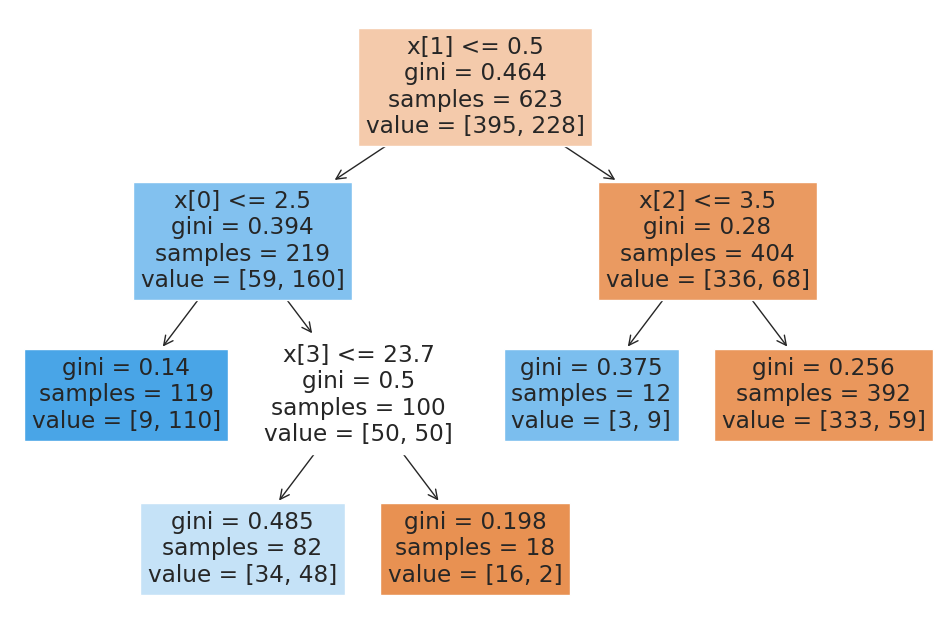

In [38]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf,filled=True)
plt.show()

# Adaboosting classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
adb = AdaBoostClassifier()
adb_model = adb.fit(X_train,y_train)

/home/diksha/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
adb_model.score(X_test,y_test)

0.7611940298507462

In [42]:
adb_model.score(X_train,y_train)

0.8459069020866774